There might be cases where you are interested to see how closely your numeric data follows some hypothetical distribution. This might be important for certain parametric statistical tests, like checking for assumptions of normality. In cases like this, you can use a **quantile-quantile plot, or Q-Q plot**, to make a visual comparison between your data and your reference distribution. Take for example the following comparison of the following data and a hypothetical normal distribution using the sample statistics:

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [25]:
df.comb.describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

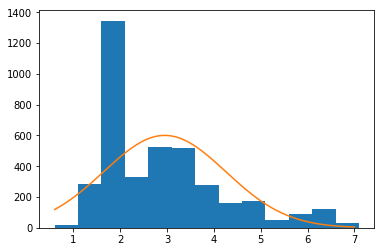

In [36]:
#create a histogram of data
bin_size = .5
bin_edges = np.arange(df.displ.min(), df.displ.max()+bin_size, bin_size)
plt.hist(data=df, x='displ', bins=bin_edges)

# overlay a theoritical normal distribution on top
samp_mean = df.displ.mean()
samp_sd = df.displ.std()

from scipy.stats import norm
x = np.linspace(df.displ.min(),df.displ.max(),200)  
y=norm.pdf(x,samp_mean,samp_sd) # normal distribution heights
y *= (df.shape[0] * bin_size) # scale the distribution height
plt.plot(x,y)

The matplotlib **plot** function is a generic function for plotting y-values against x-values, by default a line connecting each x-y pair in sequence. In this case, I first use numpy's **linspac** function to generate x-values across the range of the plot. Note that the first two arguments match the bin_edges limits, while the third argument specifies the number of values to generate between the two endpoints. Then, I use the scipy package's **norm** class to get the height of the normal distribution curve at those x-values, using the sample mean and standard deviation as distribution parameters. **pdf** stands for **probability density function**, which returns the normal distribution height (density) at each value of x. These values are such that the total area under the curve will add up to 1. Since we've got a histogram with absolute counts on the y-axis, we need to scale the curve so it's on the same scale as the main plot: we do this by multiplying the curve heights by the number of data points and bin size. 

From a visual inspection of this overlaid plot, it looks like the data is a bit sparse on the right side compared to the expected normal distribution. There's also a bit of a spike of values between 1.5 and 2. On the other hand, the left side of the curve isn't too far off from the expected distribution, though it might be said that we might be missing some expected points in the left tail of the distribution. The question that we'd like to address is if there's enough evidence from what we've observed to say that the data is significantly different from the expected normal distribution.

One way we could approach this is through a statistical test, such as using scipy's **[shapiro](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.shapiro.html)** function to perform the **Shapiro-Wilk** test. But since this is a course on data visualization, we'll inspect this question visually, using the **Q-Q plot** type. 

The main idea of the plot is this: if the data was normally distributed, then we'd expect a certain pattern in terms of how far each data point is from the mean of the distribution. **If we order the points from smallest to largest, then we could compare how large the _k_-th ranked data point is against the _k_-th ranked point from the expected distribution**.

To get these expected values, we'll make use of the norm class's **ppf** function, which stands for **percent point function**. **ppf** is a method for distributions that allows you to see values associated with probabilities. For example, norm.ppf(probability=.5, mean=0, standard deviation=1) will return 0.0 because 0.0 is the value that contains 50% of the area under the curve.


In [107]:
norm.ppf(.5,samp_mean,samp_sd)

2.950572664800204

The main question, then, is what values to stick into the ppf. There's a few different conventions around this, but they generally take the form of the following equation:

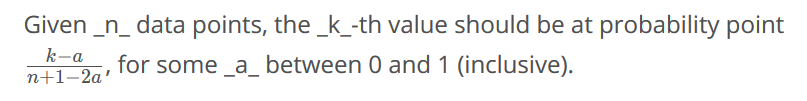

This equation distributes the probability points symmetrically about 0.5, and adjusting _a_ changes how much probability is left in the tails of the [0,1] range. Commonly, _a_ is set to a balanced value of 0.5, which gives the equation **k−0.5/n**. Let's put this all together using code:

Text(0.5,0,'Expected Values')

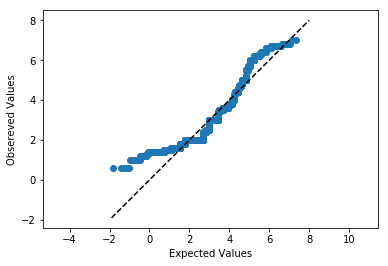

In [103]:
n_points = df.shape[0]
qs = (np.arange(n_points)-.5)/n_points
expected_value = norm.ppf(qs,samp_mean,samp_sd)

plt.scatter(expected_vals,df.displ.sort_values())
plt.plot([-1.9,8],[-1.9,8],'--',color='black')
plt.axis('equal')
plt.ylabel('Obsereved Values')
plt.xlabel('Expected Values')


It's a good idea to label the axes in this case. Since the actual and expected data are both on the same scale, the labels are a big help to keep things clear. In addition, rather than just plotting the expected and actual data alone, I've also added another **plot** call to add a diagonal x = y line. If the data matches the actual values perfectly on the expected value, they will fall directly on that diagonal line. The **plt.axis('equal')** line supports the visualization, as it will set the axis scaling to be equal, and the diagonal line will be at a 45 degree angle.

In [115]:
expected_value[qs.shape[0]//2+1]

2.950572664800204

As seen many observed points are larger than the values that would be expected from the normal distribution

Usually, the Q-Q plot is computed and rendered in terms of standardized units, rather than the scale of the original data. **A standardized dataset has a mean of 0 and standard deviation of 1**, so to convert a set of values into standard scores, we just need to **subtract the sample mean from each value to center it around 0, then divide by the sample standard deviation to scale it**. Calling methods of the **norm** class without arguments for the mean or standard deviation assume the standard normal distribution. The code changes as follows:

Text(0,0.5,'Observed standard Scores')

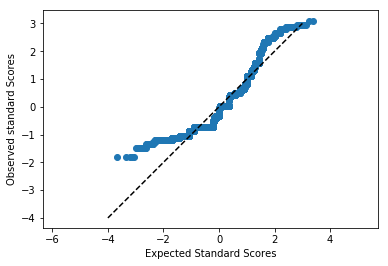

In [126]:
n_points = df.shape[0]
sq = (np.arange(n_points)-.5)/ n_points
expected_values = norm.ppf(sq)
data_scores=(df.displ.sort_values()-samp_mean)/samp_sd

plt.scatter(expected_values, data_scores)
plt.axis('equal')
plt.plot([-4,3],[-4,3],'--',color = 'black')
plt.xlabel('Expected Standard Scores')
plt.ylabel('Observed standard Scores')

Notice that the shape of the data has not changed since both datasets have been scaled in the exact same way. One of the reasons for performing this scaling is that it makes it easier to talk about the data values against the expected, theoretical distribution. In the first plot, there's no clear indication of where the center of the data lies, and how spread out the data is from that center. 

In the latter plot, we can use our expectations for how much of the data should be one or two standard deviations from the mean to better understand how the data is distributed. It also separates the values of the theoretical distribution from any properties of the observed data.
